In [2]:
# Import library

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
%config inlineBackend.figure_format='svg'
import matplotlib.pyplot as pt
pt.style.use('ggplot')
import folium
from ipywidgets import interactive
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import re
from tqdm import tqdm
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
      '#46f0f0', '3f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
      '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
      '#000075', '#808080'] * 10

In [3]:
# Read file CSV "Kebakaran_Jakbar_2020.csv" dan assign ke variabel "df"

df = pd.read_csv('Kebakaran_Jakbar_2020.csv',
                 delimiter = ','
                )

In [4]:
# Tampilin file CSV "Kebakaran_Jakbar_2020.csv"

df

,alamat_kejadian,kelurahan,kecamatan,Address,Location,Point,Lat,Lon,Alt
0,"Jl. Panjang Green Garden, Blok. I, No. 18",Kedoya Utara,Kebun Jeruk,"Jl. Panjang Green Garden, Blok. I, No. 18, Ked...","Perumahan Green Garden Blok i1 no: 18, RT.4/RW...","(-6.1659082, 106.7621509, 0.0)",-6.165908,106.762151,0
1,"Jl. Prepedan Dalam, No. 45",Kamal,Kalideres,"Jl. Prepedan Dalam, No. 45, Kamal, Kalideres","7, Jl. Prepedan Dalam No.10, RT.10/RW.7, Kamal...","(-6.111170400000001, 106.7025281, 0.0)",-6.111170,106.702528,0
2,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell)",Duri Kepa,Kebun Jeruk,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell), Du...","4, Jl. Daan Mogot No.147, RT.4/RW.5, Duri Kepa...","(-6.1635089, 106.7743823, 0.0)",-6.163509,106.774382,0
3,"Jl. Mangga Besar IX, Gg. I, No. 12",Tangki,Tamansari,"Jl. Mangga Besar IX, Gg. I, No. 12, Tangki, Ta...","12, Jl. Mangga Besar IX No.28b, RT.12/RW.1, Ta...","(-6.1465418, 106.8239602, 0.0)",-6.146542,106.823960,0
4,"Jl. Al Ma'rifah, No. 72",Rawa Buaya,Cengkareng,"Jl. Al Ma'rifah, No. 72, Rawa Buaya, Cengkareng","Jl. Al-Ma'rifah No.72, RT.1/RW.12, Rw. Buaya, ...","(-6.1637588, 106.7435497, 0.0)",-6.163759,106.743550,0
...,...,...,...,...,...,...,...,...,...
309,Jl. Krendang Selatan,Krendang,Tambora,"Jl. Krendang Selatan, Krendang, Tambora","Jl. Krendang Sel., Krendang, Kec. Tambora, Kot...","(-6.1527306, 106.8029195, 0.0)",-6.152731,106.802920,0
310,Jl. Kembangan Selatan,Kembangan Selatan,Kembangan,"Jl. Kembangan Selatan, Kembangan Selatan, Kemb...","Jl. Kembangan Selatan, Kembangan Sel., Kec. Ke...","(-6.1863559, 106.7257301, 0.0)",-6.186356,106.725730,0
311,Jl.Badilah 1,Tangki,Tamansari,"Jl.Badilah 1, Tangki, Tamansari","Jl. Badila I, Tangki, Kec. Taman Sari, Kota Ja...","(-6.1451537, 106.8227525, 0.0)",-6.145154,106.822752,0
312,Jl.Taman Palem Mutiara Blok B7 No..56 - 57,Cengkareng Timur,Cengkareng,"Jl.Taman Palem Mutiara Blok B7 No..56 - 57, Ce...","No..56 - 57, Jl. Taman Palem Mutiara Blok B7 N...","(-6.142597, 106.731084, 0.0)",-6.142597,106.731084,0


In [5]:
# Cek duplikasi di DataFrame "df"

df.duplicated(subset = ['Lat', 'Lon']).values.any()

True

In [6]:
# Cek null values di DataFrame "df"

df.isna().values.any()

False

In [7]:
# Drop null dan duplikasi di DataFrame "df"

print(f'Before Drop, Nulls and Duplicates:\tdf.shape = {df.shape}')

df.dropna(inplace = True)
df.drop_duplicates(subset = ['Lat', 'Lon'],
                   keep = 'first',
                   inplace = True
                  )

print(f'After Drop, Nulls and Duplicates:\tdf.shape = {df.shape}')

Before Drop, Nulls and Duplicates:	df.shape = (314, 9)
After Drop, Nulls and Duplicates:	df.shape = (286, 9)


In [8]:
# Cek duplikasi di DataFrame "df"

df.duplicated(subset = ['Lat', 'Lon']).values.any()

False

In [9]:
# Tampilin DataFrame "df"

df

,alamat_kejadian,kelurahan,kecamatan,Address,Location,Point,Lat,Lon,Alt
0,"Jl. Panjang Green Garden, Blok. I, No. 18",Kedoya Utara,Kebun Jeruk,"Jl. Panjang Green Garden, Blok. I, No. 18, Ked...","Perumahan Green Garden Blok i1 no: 18, RT.4/RW...","(-6.1659082, 106.7621509, 0.0)",-6.165908,106.762151,0
1,"Jl. Prepedan Dalam, No. 45",Kamal,Kalideres,"Jl. Prepedan Dalam, No. 45, Kamal, Kalideres","7, Jl. Prepedan Dalam No.10, RT.10/RW.7, Kamal...","(-6.111170400000001, 106.7025281, 0.0)",-6.111170,106.702528,0
2,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell)",Duri Kepa,Kebun Jeruk,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell), Du...","4, Jl. Daan Mogot No.147, RT.4/RW.5, Duri Kepa...","(-6.1635089, 106.7743823, 0.0)",-6.163509,106.774382,0
3,"Jl. Mangga Besar IX, Gg. I, No. 12",Tangki,Tamansari,"Jl. Mangga Besar IX, Gg. I, No. 12, Tangki, Ta...","12, Jl. Mangga Besar IX No.28b, RT.12/RW.1, Ta...","(-6.1465418, 106.8239602, 0.0)",-6.146542,106.823960,0
4,"Jl. Al Ma'rifah, No. 72",Rawa Buaya,Cengkareng,"Jl. Al Ma'rifah, No. 72, Rawa Buaya, Cengkareng","Jl. Al-Ma'rifah No.72, RT.1/RW.12, Rw. Buaya, ...","(-6.1637588, 106.7435497, 0.0)",-6.163759,106.743550,0
...,...,...,...,...,...,...,...,...,...
308,Jl. Madrasah 1 Gg WW,Sukabumi Utara,Kebun Jeruk,"Jl. Madrasah 1 Gg WW, Sukabumi Utara, Kebun Jeruk","Jl. WW, Sukabumi Utara, Kec. Kb. Jeruk, Kota J...","(-6.2131985, 106.7768966, 0.0)",-6.213198,106.776897,0
309,Jl. Krendang Selatan,Krendang,Tambora,"Jl. Krendang Selatan, Krendang, Tambora","Jl. Krendang Sel., Krendang, Kec. Tambora, Kot...","(-6.1527306, 106.8029195, 0.0)",-6.152731,106.802920,0
311,Jl.Badilah 1,Tangki,Tamansari,"Jl.Badilah 1, Tangki, Tamansari","Jl. Badila I, Tangki, Kec. Taman Sari, Kota Ja...","(-6.1451537, 106.8227525, 0.0)",-6.145154,106.822752,0
312,Jl.Taman Palem Mutiara Blok B7 No..56 - 57,Cengkareng Timur,Cengkareng,"Jl.Taman Palem Mutiara Blok B7 No..56 - 57, Ce...","No..56 - 57, Jl. Taman Palem Mutiara Blok B7 N...","(-6.142597, 106.731084, 0.0)",-6.142597,106.731084,0


In [10]:
# Convert "Lat" dan "Lon" jadi Numpy Array dan assign ke variabel "F"

F = np.array(df[['Lat', 'Lon']],
             dtype  = 'float64'
            )

F

array([[ -6.1659082, 106.7621509],
       [ -6.1111704, 106.7025281],
       [ -6.1635089, 106.7743823],
       [ -6.1465418, 106.8239602],
       [ -6.1637588, 106.7435497],
       [ -6.1679798, 106.7625571],
       [ -6.1844959, 106.7358085],
       [ -6.1642524, 106.7299479],
       [ -6.2073341, 106.7412936],
       [ -6.1476121, 106.7448883],
       [ -6.1507927, 106.7023772],
       [ -6.154996 , 106.8210121],
       [ -6.1885209, 106.7923889],
       [ -6.1909604, 106.7882376],
       [ -6.1590306, 106.7683187],
       [ -6.1754263, 106.7867273],
       [ -6.1531019, 106.7311322],
       [ -6.1544036, 106.8215967],
       [ -6.135875 , 106.6905899],
       [ -6.1887087, 106.7556308],
       [ -6.158692 , 106.82034  ],
       [ -6.15509  , 106.820954 ],
       [ -6.1466374, 106.8238469],
       [ -6.1574003, 106.8174234],
       [ -6.1494088, 106.729649 ],
       [ -6.1416396, 106.807986 ],
       [ -6.1784958, 106.7440861],
       [ -6.1519744, 106.7759074],
       [ -6.2032007,

In [11]:
# Validasi tipe data "F"

print(type(F))

<class 'numpy.ndarray'>


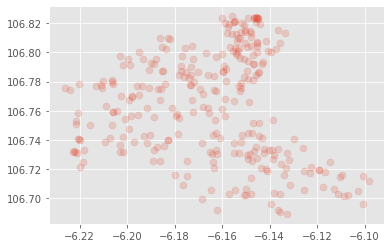

In [12]:
# Visualisasi (plotting) "F" menggunakan Matplotlib -> Scatter Plot

pt.scatter(F[:,0], F[:,1],
           alpha = 0.2,
           s = 50
          )

In [13]:
# K-Means Clustering dengan asumsi k = 3 dan di assign ke variabel "km"

k = 3

km = KMeans(n_clusters = k,
            random_state = 17
           ).fit(F)

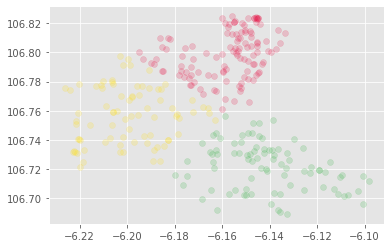

In [14]:
# Membuat class_predictions pada "F" dan melakukan visualisasi dari class_prediction pada "F"

class_predictions = km.predict(F)
unique_clusters = np.unique(class_predictions)

for unique_cluster in unique_clusters:
    A = F[class_predictions == unique_cluster]
    pt.scatter(A[:,0], A[:,1],
               alpha = 0.2,
               c = cols[unique_cluster]
              )

In [15]:
# Membuat kolom "Cluster_km{k}" pada DataFrame "df"

df[f'Cluster_km{k}'] = class_predictions

df.head()

,alamat_kejadian,kelurahan,kecamatan,Address,Location,Point,Lat,Lon,Alt,Cluster_km3
0,"Jl. Panjang Green Garden, Blok. I, No. 18",Kedoya Utara,Kebun Jeruk,"Jl. Panjang Green Garden, Blok. I, No. 18, Ked...","Perumahan Green Garden Blok i1 no: 18, RT.4/RW...","(-6.1659082, 106.7621509, 0.0)",-6.165908,106.762151,0,2
1,"Jl. Prepedan Dalam, No. 45",Kamal,Kalideres,"Jl. Prepedan Dalam, No. 45, Kamal, Kalideres","7, Jl. Prepedan Dalam No.10, RT.10/RW.7, Kamal...","(-6.111170400000001, 106.7025281, 0.0)",-6.111170,106.702528,0,1
2,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell)",Duri Kepa,Kebun Jeruk,"Jl. Daan Mogot, No. 147 (Pom Bensin Shell), Du...","4, Jl. Daan Mogot No.147, RT.4/RW.5, Duri Kepa...","(-6.1635089, 106.7743823, 0.0)",-6.163509,106.774382,0,0
3,"Jl. Mangga Besar IX, Gg. I, No. 12",Tangki,Tamansari,"Jl. Mangga Besar IX, Gg. I, No. 12, Tangki, Ta...","12, Jl. Mangga Besar IX No.28b, RT.12/RW.1, Ta...","(-6.1465418, 106.8239602, 0.0)",-6.146542,106.823960,0,0
4,"Jl. Al Ma'rifah, No. 72",Rawa Buaya,Cengkareng,"Jl. Al Ma'rifah, No. 72, Rawa Buaya, Cengkareng","Jl. Al-Ma'rifah No.72, RT.1/RW.12, Rw. Buaya, ...","(-6.1637588, 106.7435497, 0.0)",-6.163759,106.743550,0,1


In [16]:
# Visualisasi titik kebakaran di Jakarta Barat tahun 2020 menggunakan Folium

m = folium.Map(
    location = [df.Lat.mean(), df.Lon.mean()],
    zoom_starts = 12,
    tiles = 'CartoDB dark_matter'
)

for _, row in df.iterrows():
    folium.CircleMarker(
        location = [row.Lat, row.Lon],
        radius = 5,
        popup = re.sub(r'[^a-zA-Z ]+', '', row.Address),
        color = '#1787FE',
        fill = True,
        fill_color = '#1787FE'
    ).add_to(m)

m

In [17]:
# Visualisasi titik kebakaran di Jakarta Barat tahun 2020 dengan cluster masing-masing

def create_map(df, cluster_column):
    m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )
    
    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location = [row['Lat'], row['Lon']],
            radius = 5,
            popup = folium.Popup(row[cluster_column]),
            color = cluster_colour,
            fill = True,
            fill_color = cluster_colour
            ).add_to(m)
        
    return(m)

m = create_map(df, 'Cluster_km3')

m

In [18]:
# Menentukan Centroid dan di assign ke variabel "clst_center"

clst_center = km.cluster_centers_

clst_center

array([[ -6.15811931, 106.79917088],
       [ -6.14129547, 106.72169472],
       [ -6.19925678, 106.75667963]])

In [19]:
# Mengubah "clst_center" menjadi DataFrame "cc"

cc = pd.DataFrame(clst_center, columns = ['La', 'Lo'])

cc

,La,Lo
0,-6.158119,106.799171
1,-6.141295,106.721695
2,-6.199257,106.756680


In [20]:
# Validasi nilai optimal dari k menggunakan Silhouette Score dengan 198 kali pengulangan

best_s, best_k = -1, 0

for k in tqdm(range(2, 200)):
    km = KMeans(n_clusters = k,
                random_state = 1
               ).fit(F)
    
    class_predictions = km.predict(F)
    
    slht = silhouette_score(F, class_predictions)
    if slht > best_s:
        best_k = k
        best_s = slht
        
print(f'K: {best_k}')
print(f'Silhouette Score: {best_s}')

100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [02:09<00:00,  1.53it/s]

K: 3
Silhouette Score: 0.5043670449743513


In [21]:
# Validasi nilai optimal dari k menggunakan Elbow Method (1)

best_e = range(1, 10)
ssd = []
for k in best_e:
    km = KMeans(n_clusters = k)
    km.fit(F)
    ssd.append(km.inertia_)
    
ssd

[0.611945075065099,
 0.310084103794629,
 0.15643920071329592,
 0.12024894848109295,
 0.09506347294259017,
 0.07560774604556567,
 0.06564639710904148,
 0.05569929666638216,
 0.04784590863785034]

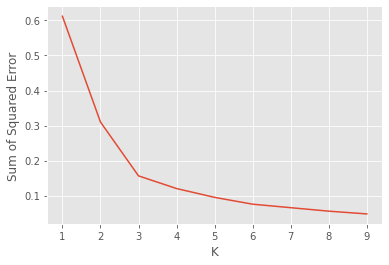

In [22]:
# Validasi nilai optimal dari k menggunakan Elbow Method (2)

pt.xlabel('K')
pt.ylabel('Sum of Squared Error')
pt.plot(best_e, ssd)

In [23]:
# Visualisasi Centroid pada cluster-cluster titik kebakaran di Jakarta Barat tahun 2020

def create_map(df, cluster_column):
    m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )
    
    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location = [row['Lat'], row['Lon']],
            radius = 5,
            popup = folium.Popup(row[cluster_column]),
            color = cluster_colour,
            fill = True,
            fill_color = cluster_colour
            ).add_to(m)

    folium.Marker(location = [-6.158119307563025, 106.79917087731093], 
                  popup = "<b>Centroid 1</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)
    
    folium.Marker(location = [-6.141295466666667, 106.72169471954022],
                  popup = "<b>Centroid 2</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)
        
    folium.Marker(location = [-6.1992567775, 106.75667962625],
                  popup = "<b>Centroid 3</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)
        
    return(m)

m = create_map(df, 'Cluster_km3')

m

In [24]:
# Read file CSV "Pos_Damkar_Jakbar.csv" dan assign ke variabel "pp"

pp = pd.read_csv('Pos_Damkar_Jakbar.csv')

In [25]:
# Tampilin file CSV "Pos_Damkar_Jakbar.csv"

pp

,Wilayah,Nama_Sektor,Nama_Bangunan,Alamat,Nama_Pos_Damkar,Latitude,Longitude
0,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Grogol Petamburan,Kantor Sudin Pemadam Kebakaran,"Jalan Tanjung Duren Raya No. 1, RT.12/RW.2, Ta...",Pos Pemadam Kebakaran Sudin Jakarta Barat,-6.173394,106.787864
1,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Grogol Petamburan,Kantor Sektor Grogol Petamburan,"Jl. Perdana, RT.10/RW.4, Wijaya Kusuma, Kec. G...",Pos Pemadam Kebakaran Sektor Grogol Petamburan,-6.152730,106.773436
2,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Grogol Petamburan,Pos Pemadam Duta Mas,"Jl. Wijaya Kusuma Blok Tt No.9, RT.8/RW.4, Wij...",Pos Pemadam Kebakaran Duta Mas,-6.150834,106.779969
3,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Palmerah,Pos Balakar Palmerah,"Jl. Belibis Terusan No.9, RW.3, Palmerah, Kec....",Pos Pemadam Kebakaran Balakar Palmerah,-6.202780,106.792492
4,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Palmerah,Pos Damkar Jatipulo,"Jl. Tunjung Raya No.36, RT.14/RW.1, Jatipulo, ...",Pos Pemadam Kebakaran Jatipulo,-6.175649,106.804046
5,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Tambora,Kantor Sektor Tambora,"Jl. Tiang Bendera I No.2, RT.5/RW.3, Roa Malak...",Pos Pemadam Kebakaran Sektor Tambora,-6.132792,106.808909
6,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Tambora,Pos Angke,"Jl. Jamhari No.3, RT.3/RW.1, Angke, Kec. Tambo...",Pos Pemadam Kebakaran Angke,-6.143676,106.800225
7,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Tambora,Pos Krendang,"Jl. Krendang Utara No.222, RT.8/RW.8, Krendang...",Pos Pemadam Kebakaran Krendang,-6.148173,106.804232
8,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Tambora,Pos Pemadam Kebakaran Jembatan Besi,"Jl. Jemb.2 RT.10/RW.1, Jembatan Besi, Tambora,...",Pos Pemadam Kebakaran Jembatan Besi,-6.151352,106.794603
9,Sudin Damkar-PB Kota Administrasi Jakarta Barat,Sektor Tamansari,Kantor Sektor Taman Sari,"Jl. Kemukus No.8, RT.9/RW.7, Pinangsia, Kec. T...",Pos Pemadam Kebakaran Sektor Taman Sari,-6.134304,106.815183


In [26]:
# Visualisasi titik lokasi pos pemadam kebakaran di Jakarta Barat dan batas wilayah administrasi kota Jakarta Barat

m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )

c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson",
                      name = 'Choropleth',
                      highlight = True,
                      line_color = 'white',
                      line_weight = 2,
                      fill_color = 'lightgray'
                     ).add_to(m)

c.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels = False)
)

for _, row in pp.iterrows():
    folium.Marker(
        location = [row.Latitude, row.Longitude],
        radius = 5,
        icon = folium.Icon(color = 'red',  icon = 'home'),
        tooltip = row.Nama_Pos_Damkar
    ).add_to(m)

m

In [27]:
# Visualisasi luas cakupan wilayah pos pemadam kebakaran di Jakarta Barat dengan radius 2500 (2,5 kilometer)

m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )

c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson",
                      name = 'Choropleth',
                      highlight = True,
                      line_color = 'white',
                      line_weight = 2,
                      fill_color = 'white'
                     ).add_to(m)

c.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels = False)
)

for _, row in pp.iterrows():
    folium.Marker(
        location = [row.Latitude, row.Longitude],
        radius = 5,
        icon = folium.Icon(color = 'red',  icon = 'home'),
        tooltip = row.Nama_Pos_Damkar
    ).add_to(m)
    
    folium.Circle(
        location = [row.Latitude, row.Longitude],
        radius = 2500,
        fill_color = 'lightblue',
        fill_opacity = 0.9
    ).add_to(m)

m

In [28]:
# Visualisasi luas cakupan titik Centroid dengan radius 2500 (2,5 kilometer)

m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )

c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson",
                      name = 'Choropleth',
                      highlight = True,
                      line_color = 'white',
                      line_weight = 2,
                      fill_color = 'white'
                     ).add_to(m)

c.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels = False)
)

for _, row in pp.iterrows():
    folium.Marker(
        location = [row.Latitude, row.Longitude],
        radius = 5,
        icon = folium.Icon(color = 'red',  icon = 'home'),
        tooltip = row.Nama_Pos_Damkar
    ).add_to(m)
    
    folium.Circle(
        location = [row.Latitude, row.Longitude],
        radius = 2500,
        fill_color = 'lightblue',
        fill_opacity = 0.9
    ).add_to(m)

folium.Marker(location = [-6.158119307563025, 106.79917087731093], 
              popup = "<b>Centroid 1</b>",
              icon = folium.Icon(color = 'blue')    
             ).add_to(m)
    
folium.Circle(location = [-6.158119307563025, 106.79917087731093], 
              radius = 2500,
              fill_color = 'black',
              opacity = 1.0
             ).add_to(m)
    
folium.Marker(location = [-6.141295466666667, 106.72169471954022], 
              popup = "<b>Centroid 2</b>",
              icon = folium.Icon(color = 'blue')
             ).add_to(m)

folium.Circle(location = [-6.141295466666667, 106.72169471954022], 
              radius = 2500,
              fill_color = 'black',
              opacity = 1.0
             ).add_to(m)
        
folium.Marker(location = [-6.1992567775, 106.75667962625], 
              popup = "<b>Centroid 3</b>",
              icon = folium.Icon(color = 'blue')
             ).add_to(m)

folium.Circle(location = [-6.1992567775, 106.75667962625], 
              radius = 2500,
              fill_color = 'black',
              opacity = 1.0\
             ).add_to(m)

m

In [31]:
# Visualisasi pembuktian “Centroid 3” adalah titik lokasi pos pemadam kebakaran baru yang tepat

def create_map(df, cluster_column):
    m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )
    
    c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson", 
                          name = 'Choropleth', 
                          highlight = True,
                          line_color='white',
                          line_weight = 2,
                          fill_color = 'lightgray',
                          opacity = 0.5
                         ).add_to(m)

    c.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels = False)
                       )
    
    for _, row in pp.iterrows():
        folium.Marker(
            location = [row.Latitude, row.Longitude],
            radius = 5,
            icon = folium.Icon(color = 'red',  icon = 'home'),
            tooltip = row.Nama_Pos_Damkar
        ).add_to(m)

        folium.Circle(
            location = [row.Latitude, row.Longitude],
            radius = 2500,
            fill_color = 'lightblue',
            fill_opacity = 0.9
        ).add_to(m)
        
    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location = [row['Lat'], row['Lon']],
            radius = 5,
            popup = folium.Popup(row[cluster_column]),
            color = cluster_colour,
            fill = True,
            fill_color = cluster_colour
            ).add_to(m)
    
    folium.Marker(location = [-6.158119307563025, 106.79917087731093], 
                  popup = "<b>Centroid 1</b>",
                  icon = folium.Icon(color = 'blue')    
                 ).add_to(m)
    
    folium.Circle(location = [-6.158119307563025, 106.79917087731093], 
                  radius = 2500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
    
    folium.Marker(location = [-6.141295466666667, 106.72169471954022], 
                  popup = "<b>Centroid 2</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.141295466666667, 106.72169471954022], 
                  radius = 2500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    folium.Marker(location = [-6.1992567775, 106.75667962625], 
                  popup = "<b>Centroid 3</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.1992567775, 106.75667962625], 
                  radius = 2500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    return(m)

m = create_map(df, 'Cluster_km3')

m

In [32]:
# Visualisasi pembuktian “Centroid 3” adalah titik lokasi pos pemadam kebakaran baru yang tepat (radius 3500 (3,5 kilometer))

def create_map(df, cluster_column):
    m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )
    
    c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson", 
                          name = 'Choropleth', 
                          highlight = True,
                          line_color='white',
                          line_weight = 2,
                          fill_color = 'lightgray',
                          opacity = 0.5
                         ).add_to(m)

    c.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels = False)
                       )
    
    for _, row in pp.iterrows():
        folium.Marker(
            location = [row.Latitude, row.Longitude],
            radius = 5,
            icon = folium.Icon(color = 'red',  icon = 'home'),
            tooltip = row.Nama_Pos_Damkar
        ).add_to(m)

        folium.Circle(
            location = [row.Latitude, row.Longitude],
            radius = 2500,
            fill_color = 'lightblue',
            fill_opacity = 0.9
        ).add_to(m)
        
    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location = [row['Lat'], row['Lon']],
            radius = 5,
            popup = folium.Popup(row[cluster_column]),
            color = cluster_colour,
            fill = True,
            fill_color = cluster_colour
            ).add_to(m)
    
    folium.Marker(location = [-6.158119307563025, 106.79917087731093], 
                  popup = "<b>Centroid 1</b>",
                  icon = folium.Icon(color = 'blue')    
                 ).add_to(m)
    
    folium.Circle(location = [-6.158119307563025, 106.79917087731093], 
                  radius = 3500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
    
    folium.Marker(location = [-6.141295466666667, 106.72169471954022], 
                  popup = "<b>Centroid 2</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.141295466666667, 106.72169471954022], 
                  radius = 3500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    folium.Marker(location = [-6.1992567775, 106.75667962625], 
                  popup = "<b>Centroid 3</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.1992567775, 106.75667962625], 
                  radius = 3500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    return(m)

m = create_map(df, 'Cluster_km3')

m

In [29]:
# Visualisasi luas cakupan wilayah “Centroid 3” dengan radius 3500 (3,5 kilometer)

def create_map(df, cluster_column):
    m = folium.Map(
        location = [df.Lat.mean(), df.Lon.mean()],
        zoom_start = 12,
        tiles = 'CartoDB dark_matter'
    )
    
    c = folium.Choropleth(geo_data = r"id-jk-jakbar.geojson", 
                          name = 'Choropleth', 
                          highlight = True,
                          line_color='white',
                          line_weight = 2,
                          fill_color = 'lightgray',
                          opacity = 0.5
                         ).add_to(m)

    c.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels = False)
                       )
    
    for _, row in pp.iterrows():
        folium.Marker(
            location = [row.Latitude, row.Longitude],
            radius = 5,
            icon = folium.Icon(color = 'red',  icon = 'home'),
            tooltip = row.Nama_Pos_Damkar
        ).add_to(m)

        folium.Circle(
            location = [row.Latitude, row.Longitude],
            radius = 2500,
            fill_color = 'lightblue',
            fill_opacity = 0.9
        ).add_to(m)
        
    for _, row in df.iterrows():
        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location = [row['Lat'], row['Lon']],
            radius = 5,
            popup = folium.Popup(row[cluster_column]),
            color = cluster_colour,
            fill = True,
            fill_color = cluster_colour
            ).add_to(m)
    
    folium.Marker(location = [-6.158119307563025, 106.79917087731093], 
                  popup = "<b>Centroid 1</b>",
                  icon = folium.Icon(color = 'blue')    
                 ).add_to(m)
    
    folium.Circle(location = [-6.158119307563025, 106.79917087731093], 
                  radius = 2500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
    
    folium.Marker(location = [-6.141295466666667, 106.72169471954022], 
                  popup = "<b>Centroid 2</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.141295466666667, 106.72169471954022], 
                  radius = 2500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    folium.Marker(location = [-6.1992567775, 106.75667962625], 
                  popup = "<b>Centroid 3</b>",
                  icon = folium.Icon(color = 'blue')
                 ).add_to(m)

    folium.Circle(location = [-6.1992567775, 106.75667962625], 
                  radius = 3500,
                  fill_color = 'black',
                  opacity = 1.0
                 ).add_to(m)
        
    return(m)

m = create_map(df, 'Cluster_km3')

m

In [36]:
#
#
#     ~~~ Tambahan: Cara Kerja K-Means Clustering ~~~
#
#

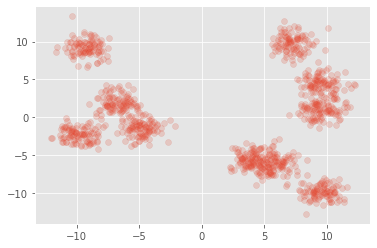

In [30]:
# Cara Kerja K-Means Clustering: Buat dummy data

X_blobs, _ = make_blobs(
    n_samples = 1000,
    centers = 10,
    n_features = 2,
    cluster_std = 1,
    random_state = 4
)

pt.scatter(X_blobs[:,0], X_blobs[:,1],
           alpha = 0.2
          )

In [31]:
# Cara Kerja K-Means Clustering: Tampilin dummy data

X_blobs

array([[ -7.07419098,   2.67633197],
       [ -9.64343042,  -3.72559985],
       [ -5.80050776,  -1.71429209],
       ...,
       [  9.08691576,  -9.67101273],
       [  4.34571708,  -4.67886795],
       [-10.82352357,  -0.48483435]])

In [32]:
# Cara Kerja K-Means Clustering: K-Means Clustering dengan asumsi k = 3 dan di assign ke variable "kmns"

kmns = KMeans(n_clusters = 3).fit(X_blobs)

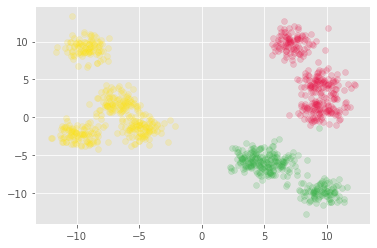

In [33]:
# Cara Kerja K-Means Clustering: Membuat class_predictions pada "X_blobs" dan visualisasi dari class_prediction pada "X_blobs"

class_predictions = kmns.predict(X_blobs)

unique_clusters = np.unique(class_predictions)

for unique_cluster in unique_clusters:
    X = X_blobs[class_predictions == unique_cluster]
    pt.scatter(X[:,0], X[:,1],
               alpha = 0.2,
               c = cols[unique_cluster]
              )

In [34]:
# Cara Kerja K-Means Clustering: Membuat Interactive Plot (1)

data = defaultdict(dict)

for x in range(1,21):
    kmns = KMeans(
        n_clusters = 3,
        random_state = 17,
        max_iter = x,
        n_init = 1
    ).fit(X_blobs)
    
    data[x]['class_predictions'] = kmns.predict(X_blobs)
    data[x]['centroids'] = kmns.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions)

In [35]:
# Cara Kerja K-Means Clustering: Membuat Interactive Plot (2)

def f(x):
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']
    
    for unique_class in unique_classes:
        pt.scatter(X_blobs[class_predictions == unique_class][:,0],
                   X_blobs[class_predictions == unique_class][:,1],
                   alpha = 0.3,
                   c = cols[unique_class]
                  )
        
    pt.scatter(centroids[:,0], centroids[:,1],
               s = 200,
               c = '#000000',
               marker = '*'
              )
    
    pt.ylim([-15,15]); pt.xlim([-15,15])
    pt.title('K-Means Clustering')

interactive_plot = interactive(f, x = (1, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output(layout=Layout(height='350px'…